<a href="https://colab.research.google.com/github/Andrew-Cutlip/RL-News-Reccomendation/blob/main/RL_Final_Project_Checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install newsapi-python
#https://newsapi.org/

from newsapi import NewsApiClient
import json

#Collect news articles using newsapi based on each of their 7 available categories.
#Store these articles based on their category
#Output each category separately as a json file
output = {}
categories = ['business','entertainment','general','health','science','sports','technology']
p = 1
for i in categories:
    newsapi = NewsApiClient(api_key='ddd3987e0e0944adbb0826bc363fb411')
    articles = []
    while True:
        #Only outputs 40 articles per page
        news = newsapi.get_top_headlines(category=i,country='us',page=p)
        if len(news['articles']) == 0:
            p = 1
            break
        for j in news['articles']:
            articles.append(j)
        p += 1
        
    out = newsapi.get_top_headlines(category=i,country='us',page=p)
    out['articles'] = articles
    output[i] = out

    jsonString = json.dumps(output[i])
    jsonFile = open(i + ".json", "w")
    jsonFile.write(jsonString)
    jsonFile.close()

In [ ]:
import json
import tensorflow as tf
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
import numpy as np

#Read and store the articles from each category file
def get_articles(categories):

          articles_by_category = {}
          for i in categories:
            #First initialize an empty list for each category:list dictionary pairing
            articles_by_category[i] = []
            #Read in each file of articles for a specific category
            f = open(i + '.json',)
            data = json.load(f)
            #Add all articles to their respective category list
            for j in data['articles']:
              #Try to avoid duplicates
              if j not in articles_by_category[i]:
                articles_by_category[i].append(j)

          #Also get total number of articles and a list of all articles
          count = 0
          articles = []
          for i in articles_by_category:
            for j in articles_by_category[i]:
              articles.append(j)
              count += 1

          #Return articles separated by categories, all articles, and the number of articles
          return articles_by_category, articles, count

#NN using specifications such as category, source, and additional ones later on
#to narrow down the best options
def model_category(dimensions):
  model = Sequential()
  model.add(Dense(64, activation='relu', input_dim=1))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(dimensions, activation = 'linear'))
  model.compile(loss="mse", optimizer=Adam())
  return model

#Use the info from the results of the NN above to then choose the best article(s)
def model_article(dimensions):
  model = Sequential()
  model.add(Dense(64, activation='relu', input_dim=dimensions))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(dimensions, activation = 'linear'))
  model.compile(loss="mse", optimizer=Adam())
  return model

In [ ]:
#Testing just categories and sources
categories = ['business', 'entertainment', 'general', 'health', 'science', 'sports', 'technology']
sources = ['CNN', 'Fox', 'NBC', 'Yahoo', 'NY Times']
dictionary, articles, count = get_articles(categories)
test_articles = tf.keras.utils.to_categorical([x for x in range(len(articles))])
test_categories = tf.keras.utils.to_categorical([x for x in range(len(categories))])
test_sources = tf.keras.utils.to_categorical([x for x in range(len(sources))])
input = np.zeros((len(categories),len(sources)))

In [ ]:
#Will predict the best categories, sources, etc.
category_network = model_category(input.shape[0] * input.shape[1])
category_network.predict([20])

array([[ 5.5303946 , -1.6566074 , -1.868009  , -0.03930004,  1.4747511 ,
         3.7728841 , -3.5733588 , -1.4677445 , -1.556563  ,  0.22044267,
        -2.1284733 ,  0.6250434 , -1.8423033 ,  1.3613594 ,  0.54959285,
        -0.03525704,  1.0029222 , -2.2187312 , -0.36850268,  1.2978175 ,
        -1.2625779 , -0.6808103 , -1.8780624 , -1.0403682 , -3.168286  ,
         3.7793667 , -2.1145532 , -0.5132835 , -2.1722107 ,  0.29567036,
         1.3293519 , -2.854562  , -1.2936492 ,  0.59742355, -2.2229075 ]],
      dtype=float32)

In [ ]:
#Will predict the best articles
article_network = model_article(len(articles))
article_network.predict(test_articles)

array([[ 0.02842958, -0.01918323,  0.00426571, ..., -0.02624595,
         0.01662601, -0.01392839],
       [ 0.00713418,  0.00737917, -0.01377758, ..., -0.02932087,
         0.022171  ,  0.00739779],
       [ 0.01137135,  0.00117633, -0.00178598, ..., -0.03742161,
         0.00053511, -0.00835036],
       ...,
       [ 0.01389274,  0.00020527,  0.01170358, ..., -0.01732264,
         0.0185889 , -0.00158778],
       [ 0.03619907,  0.02391271, -0.00646777, ..., -0.04770539,
         0.03227527, -0.0096007 ],
       [ 0.01134513,  0.0151197 ,  0.00856792, ..., -0.02226889,
         0.01242851,  0.00906009]], dtype=float32)

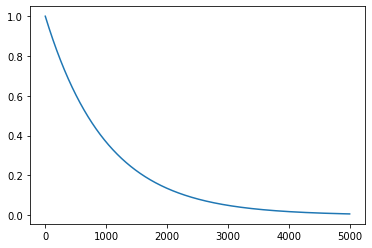

In [ ]:
#Testing out our potential epsilon decay
import matplotlib.pyplot as plt

epsilon = 1
epsilons = []
epsilon_decay = 0.999

episodes = 5000

for i in range(episodes):
  epsilons.append(epsilon)
  epsilon *= epsilon_decay

plt.plot(epsilons)